# Let's read in our manually tracked Exp005 FRAP data and generate some plots

These files contain the data for foci and the surrounding cytoplasmic spot

## TODO

- More consistent naming of measurements
- Better ROIs


In [1]:
from os import listdir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

In [2]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
Exp005_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp005_Improved_FocusTracking/"

In [4]:
Exp005_files = listdir(Exp005_folder)
Exp005_files

['EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_05_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_08_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv']

## Read in the data

There are no symbols in the header so reading in the data here is simple

In [6]:
df_list = list()

for n, file in enumerate(Exp005_files):
    
    path = Exp005_folder+file

    # We have to use the open function because the ImageJ manual tracker plugin gave headers with a degree symbol.
    df = pd.read_csv(Exp005_folder+file)
    
    # Let's clean up the header
    df.rename(columns={"tracks": "Track", "slices": "Frame"}, inplace=True) #Frame is a better name for timepoints
    
    # We can add the file name and a numeric index at this early stage.
    df.insert(0, 'File', n)
    df['Filename'] = file
    
    df_list.append(df)

In [7]:
df_list[1]

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename
0,1,1,1,241,236,383.959,207.469,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
1,1,1,2,242,234,141.835,133.490,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
2,1,1,3,241,234,150.412,136.337,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
3,1,1,4,242,234,154.711,145.597,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
4,1,1,5,243,234,171.320,157.362,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
...,...,...,...,...,...,...,...,...
398,1,3,117,216,264,231.196,202.755,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
399,1,3,118,214,261,230.216,209.128,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
400,1,3,119,213,257,222.546,212.663,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
401,1,3,120,213,257,218.557,207.944,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv


## Pull out Individual Traces

In [8]:
# Concatenate dataframes from different files, and group by File and Track for plotting
combined_df = pd.concat(df_list, axis=0)
combined_df

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename
0,0,1,1,229,268,195.701,125.750,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
1,0,1,2,229,268,122.021,119.526,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
2,0,1,3,229,268,120.093,116.668,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
3,0,1,4,229,268,119.732,117.791,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
4,0,1,5,229,269,122.577,118.964,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
...,...,...,...,...,...,...,...,...
355,10,3,116,272,240,807.309,488.020,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv
356,10,3,117,272,240,832.454,487.301,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv
357,10,3,118,272,240,825.062,472.980,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv
358,10,3,119,272,240,808.433,478.816,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv


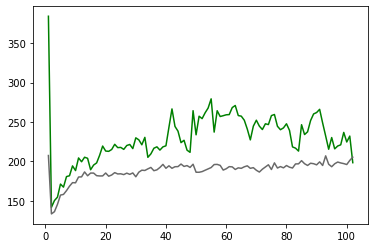

In [33]:
# Plot individual trace
File_number = 1
Track_number = 1

data = combined_df[combined_df.File.eq(File_number) & combined_df.Track.eq(Track_number)]
plt.plot(data.Frame, data.focus_intensities, c='g');
plt.plot(data.Frame, data.spot_intensities, c='dimgrey');

In [50]:
# How many traces do we have total?
summary_df = combined_df.groupby(by=["File", "Track"]).max().reset_index()
summary_df

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename
0,0,1,120,231,269,195.701,125.750,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
1,0,2,120,274,262,160.918,134.974,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
2,0,3,120,279,250,171.711,132.036,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
3,0,4,120,250,239,149.021,129.403,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
4,0,5,120,230,294,140.887,127.097,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv
5,1,1,102,249,237,383.959,207.469,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
6,1,2,180,292,244,437.773,218.765,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
7,1,3,121,245,275,367.186,252.357,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv
8,2,1,43,262,248,636.443,306.704,EML4-ALKv1_Box_FRAP_05_Tracking_Results.csv
9,3,1,120,229,236,1575.113,916.883,EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv


In [52]:
summary_df["ALKv1"] = summary_df['Filename'].str.contains("ALKv1")
summary_df["ALKv3"] = summary_df['Filename'].str.contains("ALKv3")
summary_df

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename,ALKv1,ALKv3
0,0,1,120,231,269,195.701,125.750,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
1,0,2,120,274,262,160.918,134.974,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
2,0,3,120,279,250,171.711,132.036,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
3,0,4,120,250,239,149.021,129.403,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
4,0,5,120,230,294,140.887,127.097,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
5,1,1,102,249,237,383.959,207.469,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv,True,False
6,1,2,180,292,244,437.773,218.765,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv,True,False
7,1,3,121,245,275,367.186,252.357,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv,True,False
8,2,1,43,262,248,636.443,306.704,EML4-ALKv1_Box_FRAP_05_Tracking_Results.csv,True,False
9,3,1,120,229,236,1575.113,916.883,EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv,True,False


In [54]:
#We have 50 tracks.
#30 for EML4-ALKv1
#21 for EML4-ALKv3
summary_df["ALKv3"].value_counts()

False    30
True     21
Name: ALKv3, dtype: int64

In [57]:
#40 tracks are full length
(summary_df["Frame"]>=120).value_counts()

True     40
False    11
Name: Frame, dtype: int64

In [66]:
idx = np.where((summary_df["Frame"]>=120) & (summary_df["ALKv1"]==True))

## 23 full ALKv1 tracks
summary_df.loc[idx].reset_index()

,index,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename,ALKv1,ALKv3
0,0,0,1,120,231,269,195.701,125.750,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
1,1,0,2,120,274,262,160.918,134.974,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
2,2,0,3,120,279,250,171.711,132.036,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
3,3,0,4,120,250,239,149.021,129.403,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
4,4,0,5,120,230,294,140.887,127.097,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,True,False
5,6,1,2,180,292,244,437.773,218.765,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv,True,False
6,7,1,3,121,245,275,367.186,252.357,EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv,True,False
7,9,3,1,120,229,236,1575.113,916.883,EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv,True,False
8,10,3,2,120,257,279,731.258,420.556,EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv,True,False
9,11,3,3,120,274,276,659.196,448.643,EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv,True,False


In [67]:
idx = np.where((summary_df["Frame"]>=120) & (summary_df["ALKv3"]==True))

## 17 full ALKv3 tracks
summary_df.loc[idx].reset_index()

,index,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename,ALKv1,ALKv3
0,30,7,1,120,236,244,614.093,261.781,EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv,False,True
1,31,7,2,120,262,249,405.258,205.066,EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv,False,True
2,32,7,3,120,274,237,250.278,196.082,EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv,False,True
3,34,7,5,120,275,269,291.990,214.276,EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv,False,True
4,35,8,1,120,256,270,825.557,198.587,EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv,False,True
5,36,8,2,120,281,253,566.557,208.668,EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv,False,True
6,37,8,3,120,288,286,245.680,167.240,EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv,False,True
7,38,8,4,120,240,238,469.670,249.367,EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv,False,True
8,39,8,5,120,278,228,620.072,215.806,EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv,False,True
9,40,9,1,120,243,263,1360.598,494.949,EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv,False,True


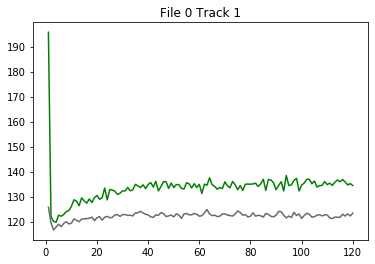

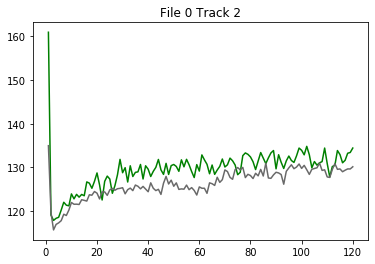

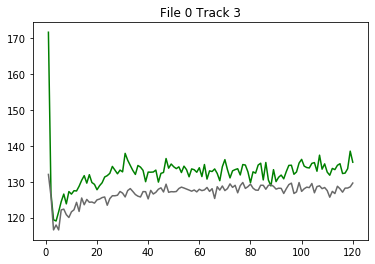

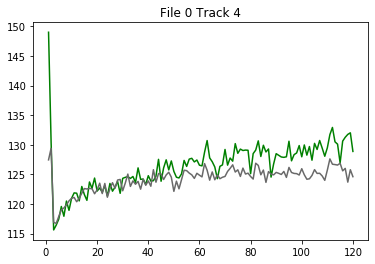

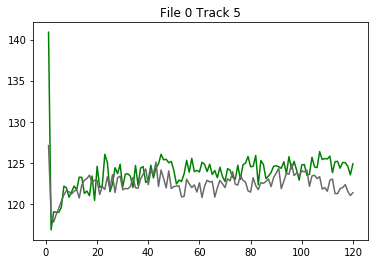

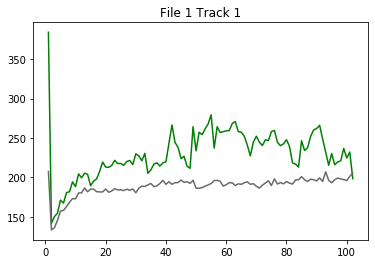

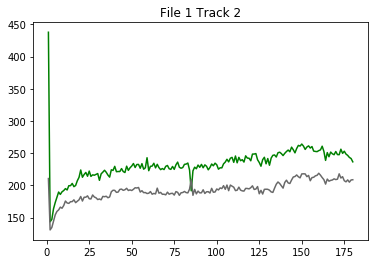

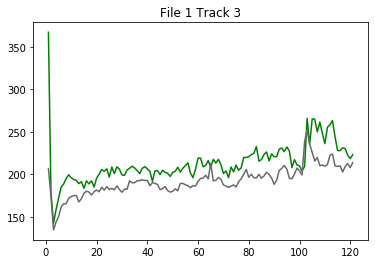

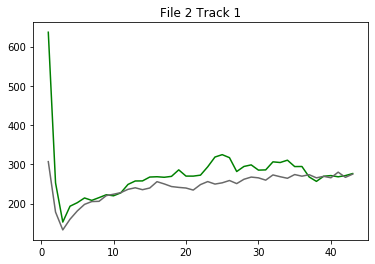

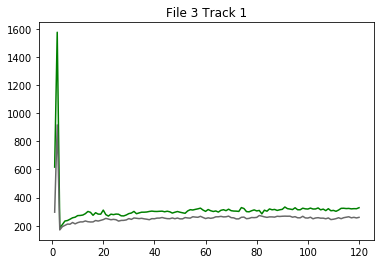

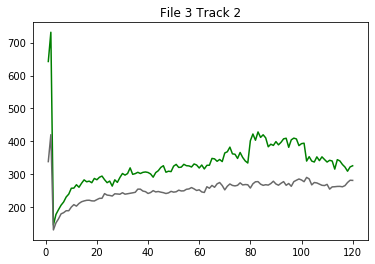

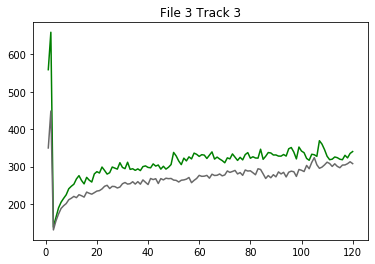

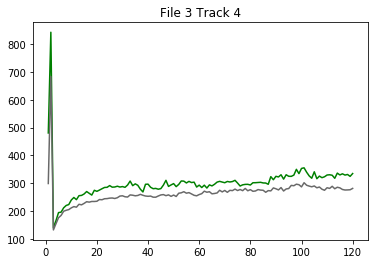

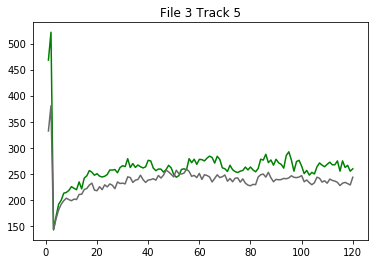

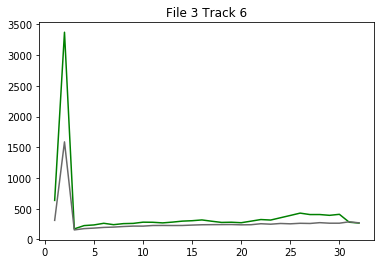

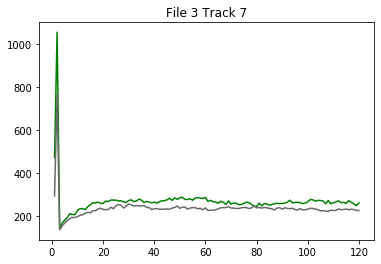

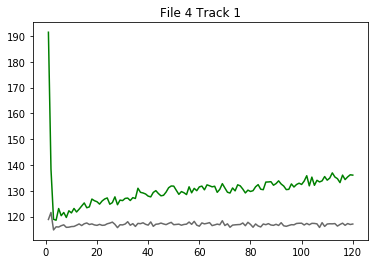

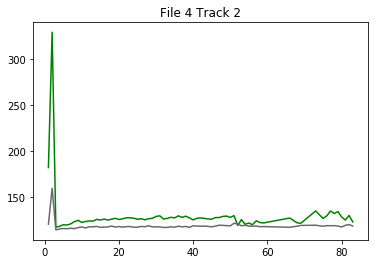

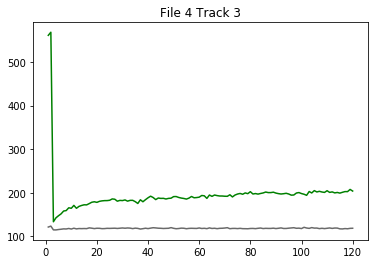

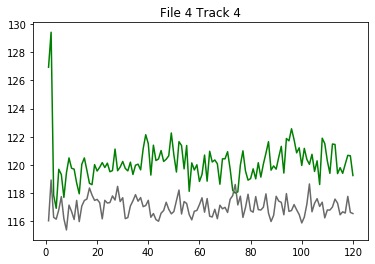

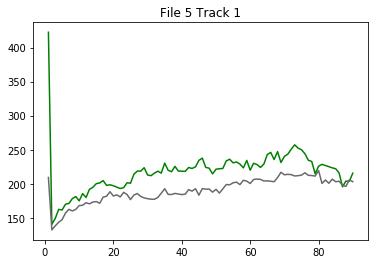

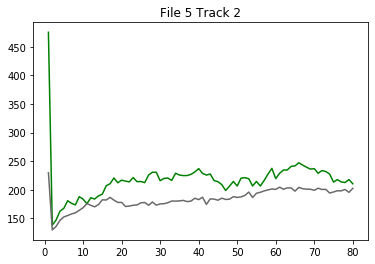

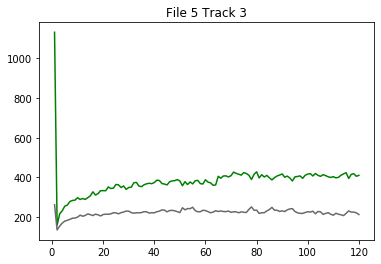

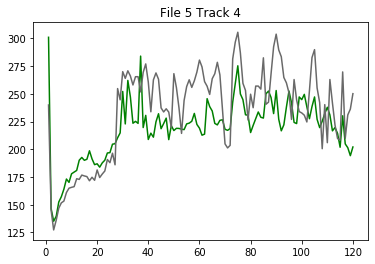

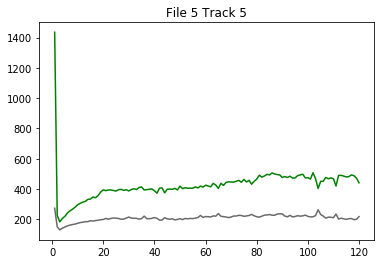

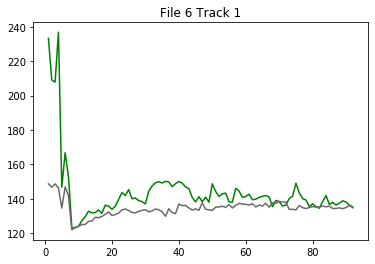

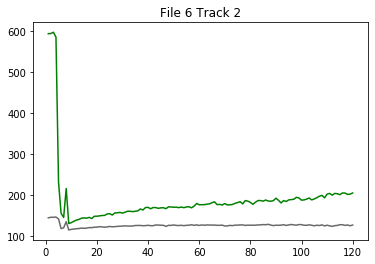

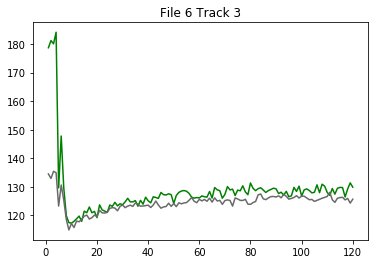

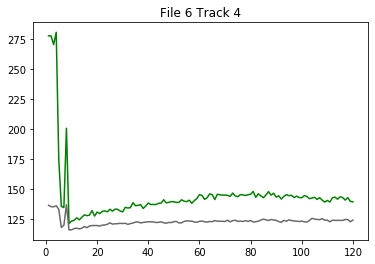

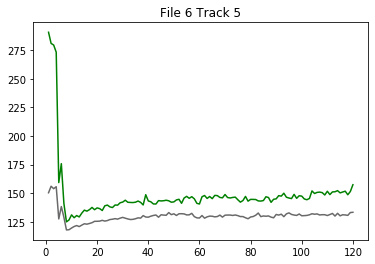

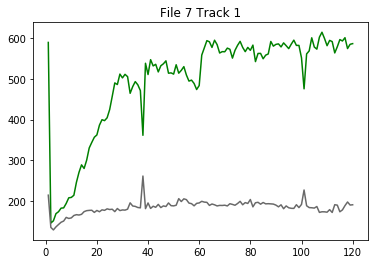

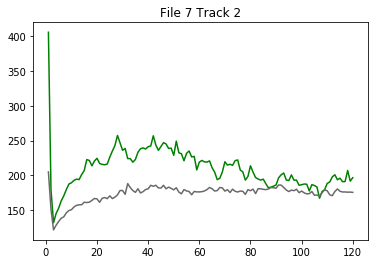

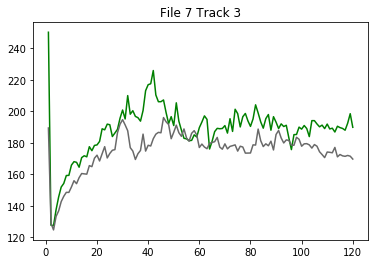

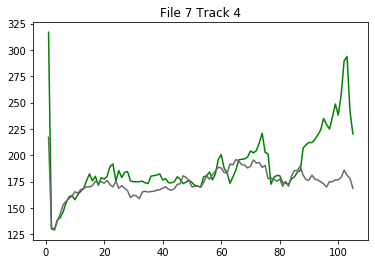

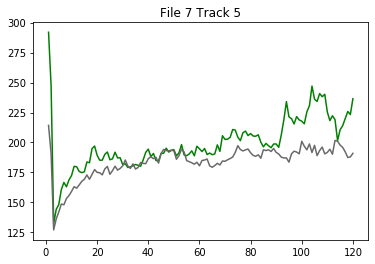

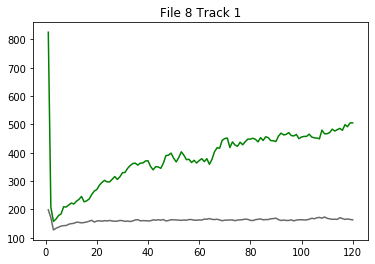

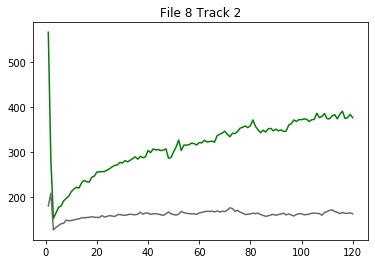

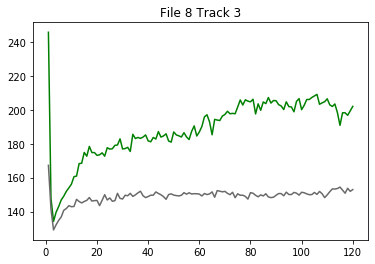

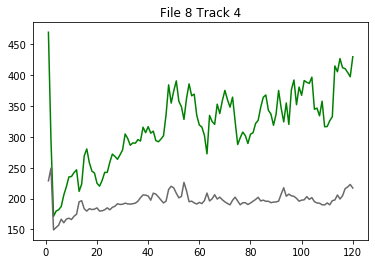

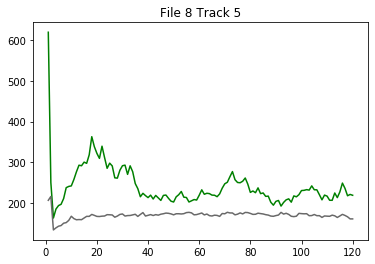

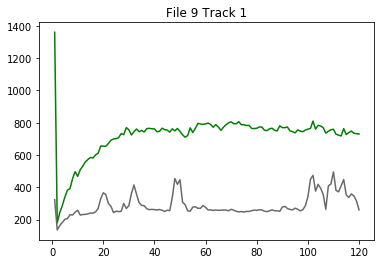

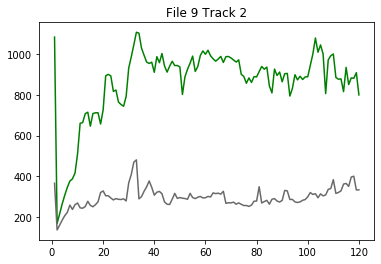

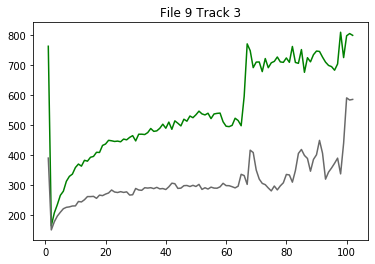

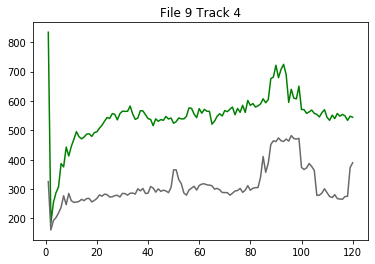

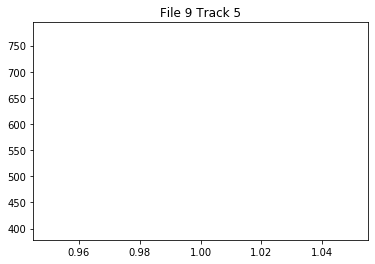

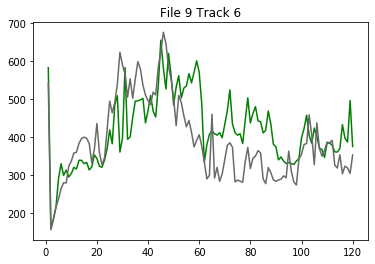

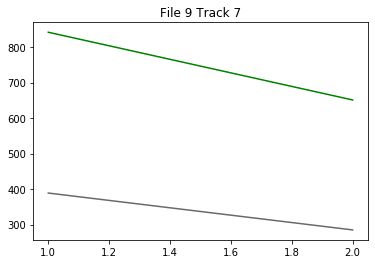

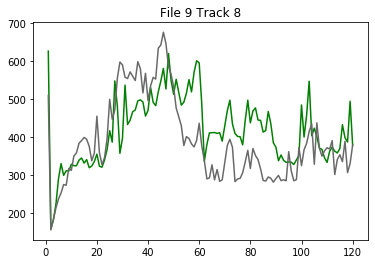

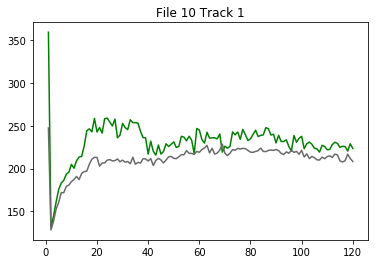

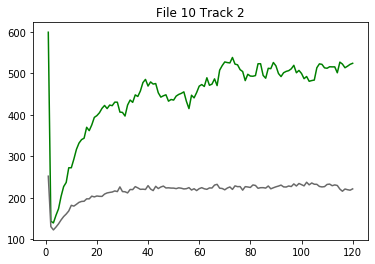

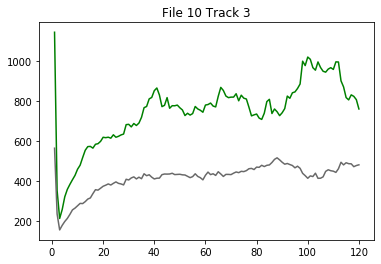

In [40]:
for File_number in combined_df.File.unique():
    file_data = combined_df[combined_df.File.eq(File_number)]
    
    for Track_number in file_data.Track.unique():
        track_data = file_data[file_data.Track.eq(Track_number)]

        plt.plot(track_data.Frame, track_data.focus_intensities, c='g');
        plt.plot(track_data.Frame, track_data.spot_intensities, c='dimgrey');
        plt.title("File "+ str(File_number) + " Track "+ str(Track_number))
        plt.show()

In [100]:
## Each file needs a "BGD" control for normalization.
Exp005_BGD_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp005_Results/"
Exp005_BGD_files = listdir(Exp005_BGD_folder)

BGD_df_list = list()

for n, file in enumerate(Exp005_BGD_files):
    
    path = Exp005_BGD_folder+file

    # We have to use the open function because the ImageJ manual tracker plugin gave headers with a degree symbol.
    df = pd.read_csv(path)
    
    # Append file name
    df['Filename'] = file
    
    # Rename 1st column as Frames
    df.rename(columns={' ': 'Frame'}, inplace=True)
    
    # Drop unnecessary columns
    df = df.loc[:,['Frame', 'Mean(Bgd)', 'Filename']]
    
    BGD_df_list.append(df)

In [103]:
# Quick check
BGD_df_list[3]

,Frame,Mean(Bgd),Filename
0,1,114.775,EML4-ALKv1_Box_FRAP_07_Results.csv
1,2,114.631,EML4-ALKv1_Box_FRAP_07_Results.csv
2,3,114.532,EML4-ALKv1_Box_FRAP_07_Results.csv
3,4,115.102,EML4-ALKv1_Box_FRAP_07_Results.csv
4,5,114.157,EML4-ALKv1_Box_FRAP_07_Results.csv
...,...,...,...
115,116,114.270,EML4-ALKv1_Box_FRAP_07_Results.csv
116,117,114.396,EML4-ALKv1_Box_FRAP_07_Results.csv
117,118,114.952,EML4-ALKv1_Box_FRAP_07_Results.csv
118,119,114.898,EML4-ALKv1_Box_FRAP_07_Results.csv


In [105]:
## Clean up filenames and merge data frames on Filename and Frame?
BGD_df_list[3].Filename.str.replace("_Results.csv", "")

0      EML4-ALKv1_Box_FRAP_07
1      EML4-ALKv1_Box_FRAP_07
2      EML4-ALKv1_Box_FRAP_07
3      EML4-ALKv1_Box_FRAP_07
4      EML4-ALKv1_Box_FRAP_07
                ...          
115    EML4-ALKv1_Box_FRAP_07
116    EML4-ALKv1_Box_FRAP_07
117    EML4-ALKv1_Box_FRAP_07
118    EML4-ALKv1_Box_FRAP_07
119    EML4-ALKv1_Box_FRAP_07
Name: Filename, Length: 120, dtype: object

In [107]:
BGD_combined_df = pd.concat(BGD_df_list, axis=0)

In [106]:
#Clean up Tracking Results File Names
combined_df.Filename.str.replace("_Tracking_Results.csv", "")

0      EML4-ALKv1_Box_FRAP_03
1      EML4-ALKv1_Box_FRAP_03
2      EML4-ALKv1_Box_FRAP_03
3      EML4-ALKv1_Box_FRAP_03
4      EML4-ALKv1_Box_FRAP_03
                ...          
355    EML4-ALKv3_Box_FRAP_07
356    EML4-ALKv3_Box_FRAP_07
357    EML4-ALKv3_Box_FRAP_07
358    EML4-ALKv3_Box_FRAP_07
359    EML4-ALKv3_Box_FRAP_07
Name: Filename, Length: 5580, dtype: object

In [114]:
def merge_BGD(tracking_result_df, bgd_results_df):
    
    tracking_result_df["Experiment"] = tracking_result_df.Filename.str.replace("_Tracking_Results.csv", "")
    bgd_results_df["Experiment"]     = bgd_results_df.Filename.str.replace("_Results.csv", "")
    

    return pd.merge(tracking_result_df, bgd_results_df, on=["Experiment", "Frame"])

In [116]:
main_df = merge_BGD(combined_df, BGD_combined_df)
main_df

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename_x,Experiment,Mean(Bgd),Filename_y
0,0,1,1,229,268,195.701,125.750,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,EML4-ALKv1_Box_FRAP_03,113.280,EML4-ALKv1_Box_FRAP_03_Results.csv
1,0,2,1,267,262,160.918,134.974,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,EML4-ALKv1_Box_FRAP_03,113.280,EML4-ALKv1_Box_FRAP_03_Results.csv
2,0,3,1,278,250,171.711,132.036,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,EML4-ALKv1_Box_FRAP_03,113.280,EML4-ALKv1_Box_FRAP_03_Results.csv
3,0,4,1,250,239,149.021,127.449,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,EML4-ALKv1_Box_FRAP_03,113.280,EML4-ALKv1_Box_FRAP_03_Results.csv
4,0,5,1,230,294,140.887,127.097,EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv,EML4-ALKv1_Box_FRAP_03,113.280,EML4-ALKv1_Box_FRAP_03_Results.csv
...,...,...,...,...,...,...,...,...,...,...,...
5532,10,2,119,248,261,521.515,218.577,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv,EML4-ALKv3_Box_FRAP_07,113.454,EML4-ALKv3_Box_FRAP_07_Results.csv
5533,10,3,119,272,240,808.433,478.816,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv,EML4-ALKv3_Box_FRAP_07,113.454,EML4-ALKv3_Box_FRAP_07_Results.csv
5534,10,1,120,226,283,223.474,208.245,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv,EML4-ALKv3_Box_FRAP_07,114.031,EML4-ALKv3_Box_FRAP_07_Results.csv
5535,10,2,120,248,261,524.041,221.765,EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv,EML4-ALKv3_Box_FRAP_07,114.031,EML4-ALKv3_Box_FRAP_07_Results.csv


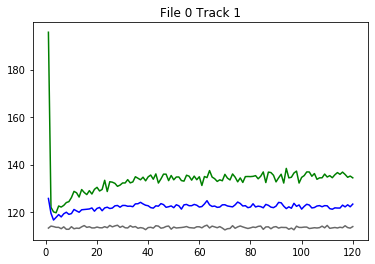

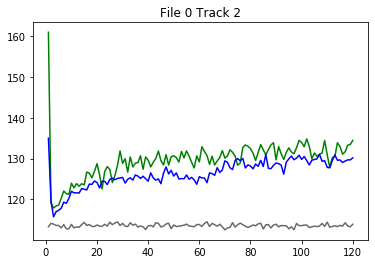

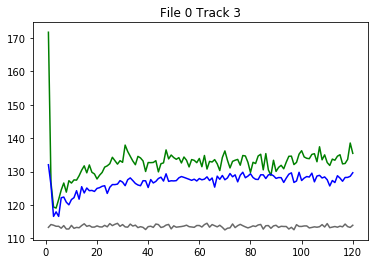

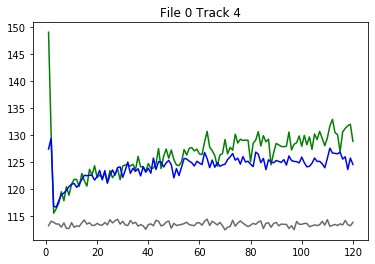

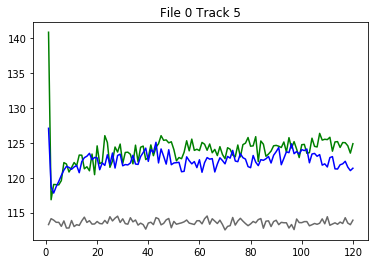

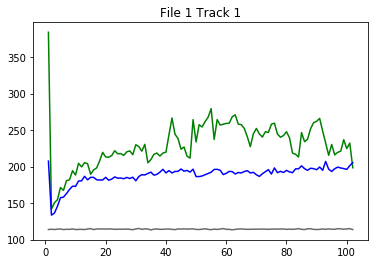

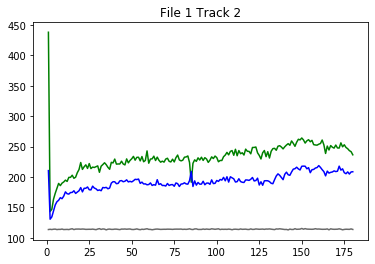

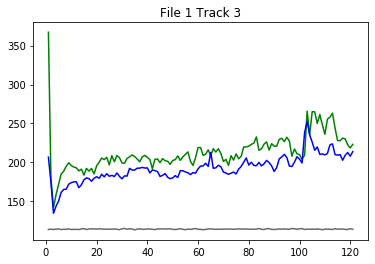

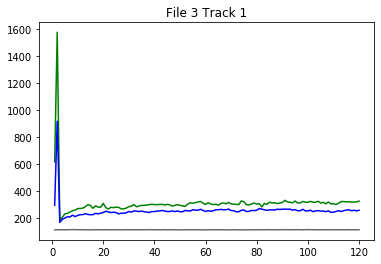

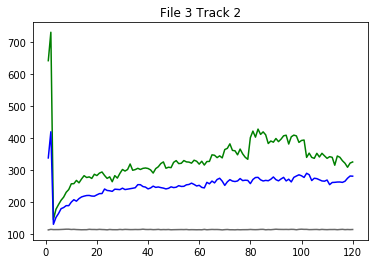

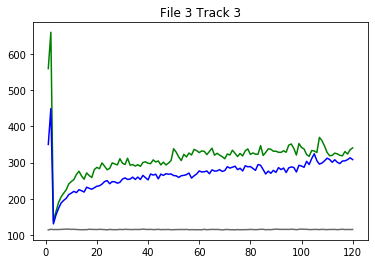

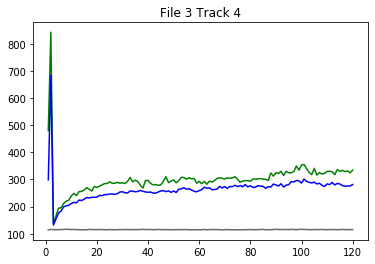

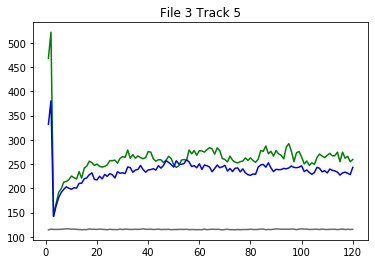

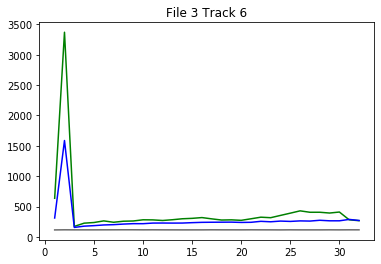

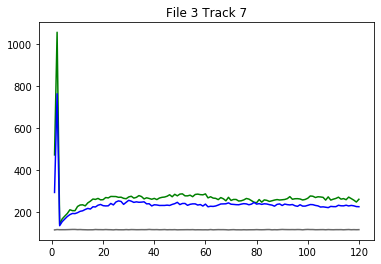

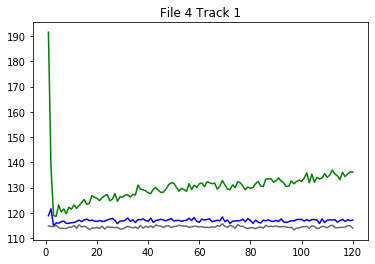

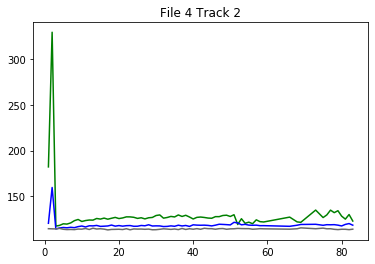

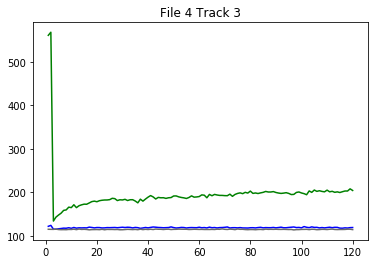

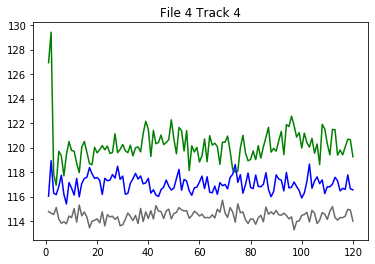

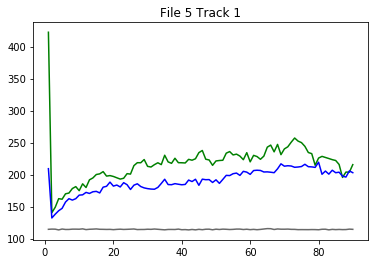

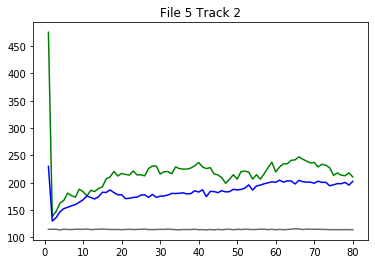

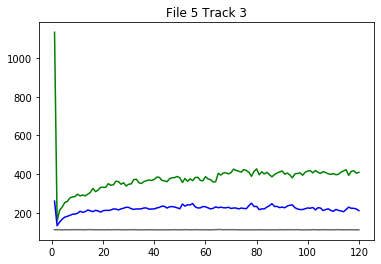

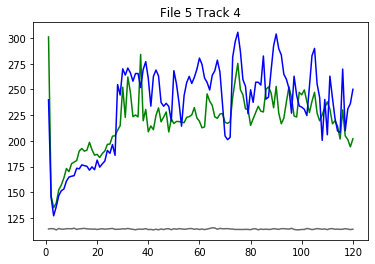

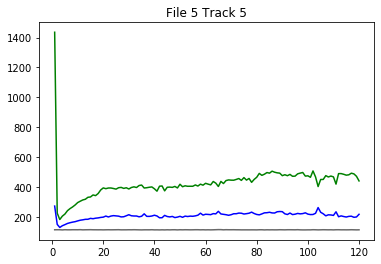

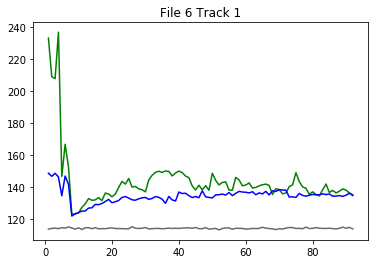

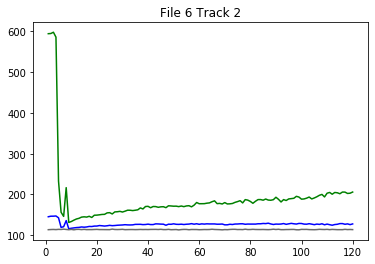

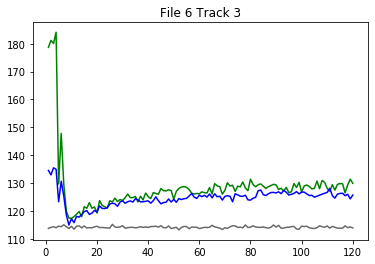

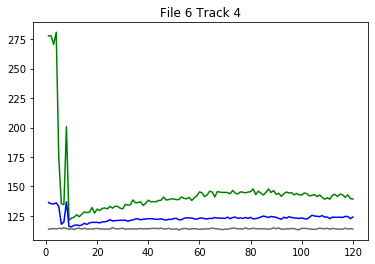

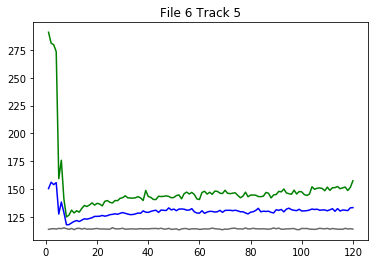

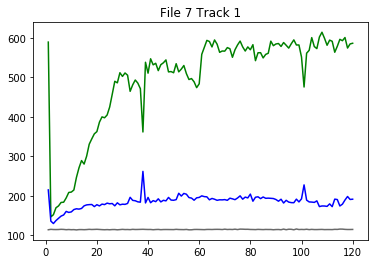

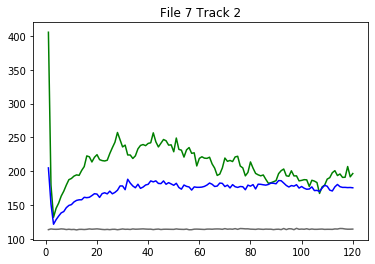

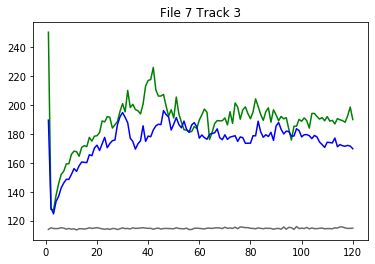

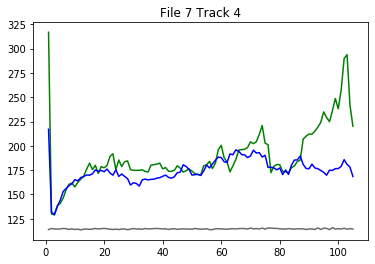

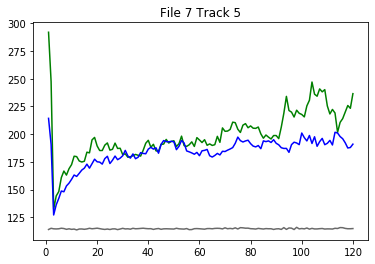

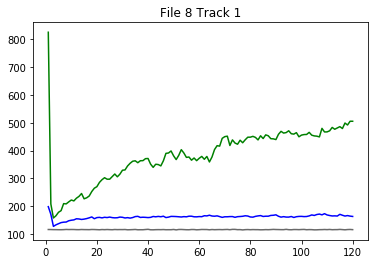

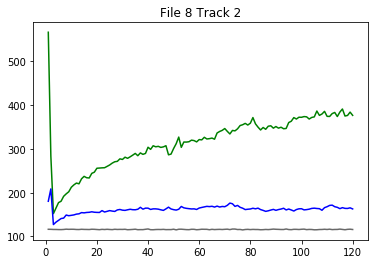

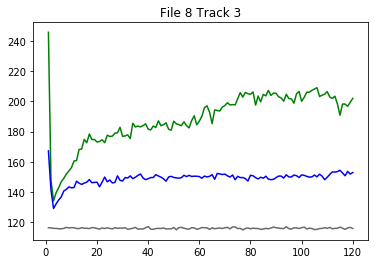

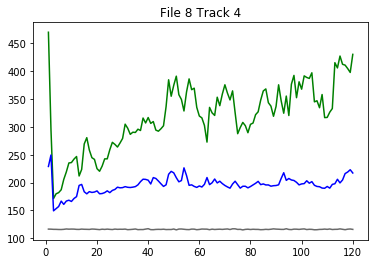

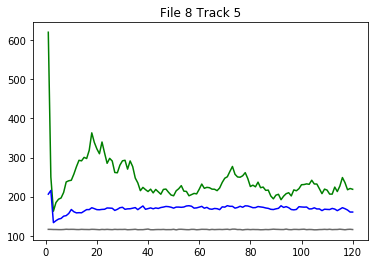

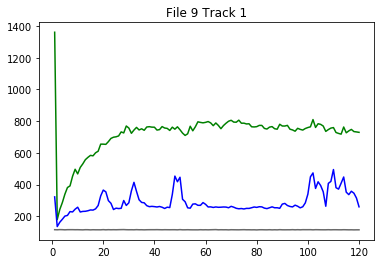

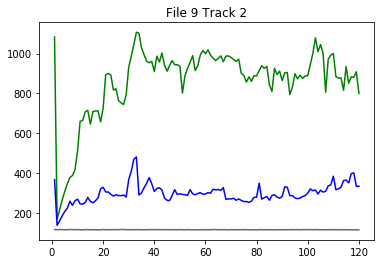

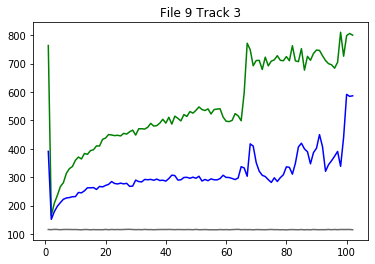

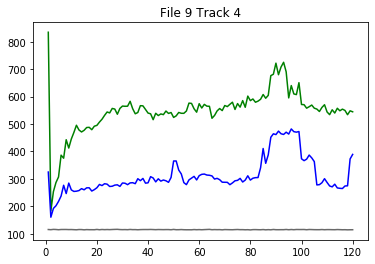

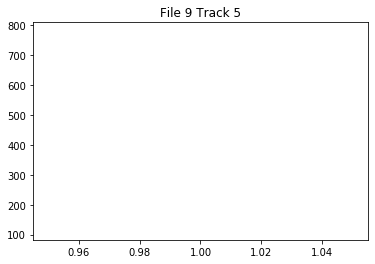

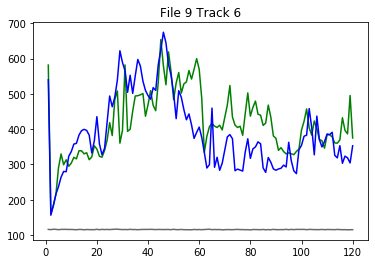

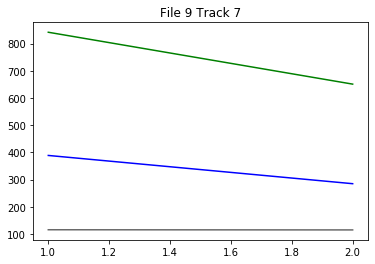

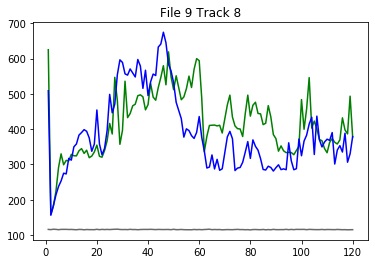

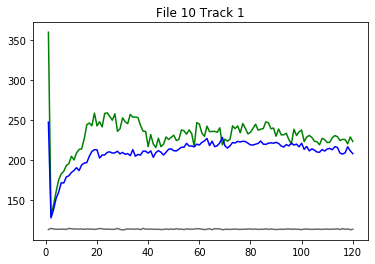

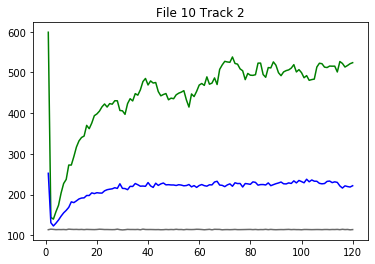

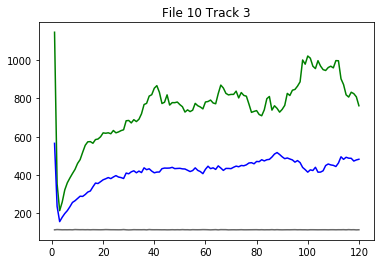

In [119]:
#Plot with background

for File_number in main_df.File.unique():
    file_data = main_df[main_df.File.eq(File_number)]
    
    for Track_number in file_data.Track.unique():
        track_data = file_data[file_data.Track.eq(Track_number)]

        plt.plot(track_data.Frame, track_data.focus_intensities, c='g');
        plt.plot(track_data.Frame, track_data.spot_intensities, c='b');
        plt.plot(track_data.Frame, track_data["Mean(Bgd)"], c='dimgrey');
        plt.title("File "+ str(File_number) + " Track "+ str(Track_number))
        plt.show()

,File,Track,Frame,X,Y,focus_intensities,spot_intensities,Filename_x,Experiment,Mean(Bgd),Filename_y
4478,9,5,1,241,243,775.577,397.372,EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv,EML4-ALKv3_Box_FRAP_05,115.785,EML4-ALKv3_Box_FRAP_05_Results.csv


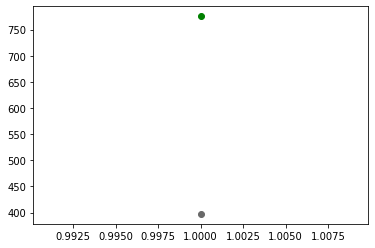

In [124]:
# Plot individual trace
File_number = 9
Track_number = 5

data = main_df[main_df.File.eq(File_number) & main_df.Track.eq(Track_number)]
plt.scatter(data.Frame, data.focus_intensities, c='g');
plt.scatter(data.Frame, data.spot_intensities, c='dimgrey');
data

In [125]:
## Filter out the crappy files/ traces

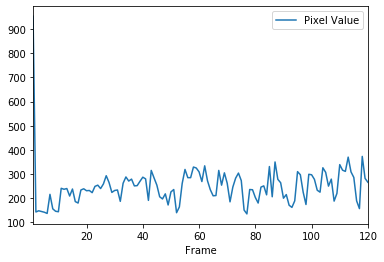

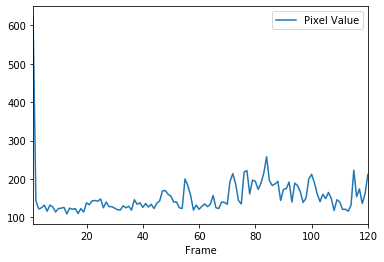

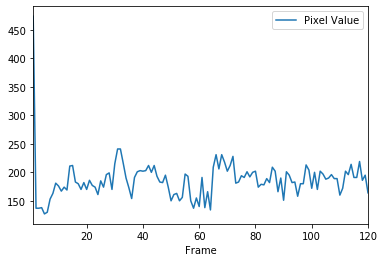

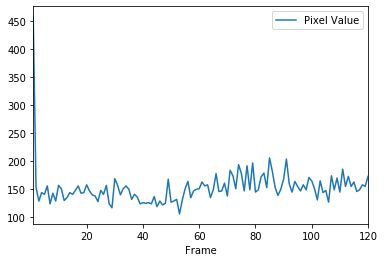

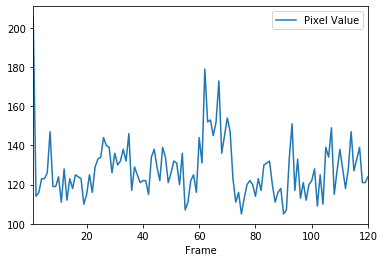

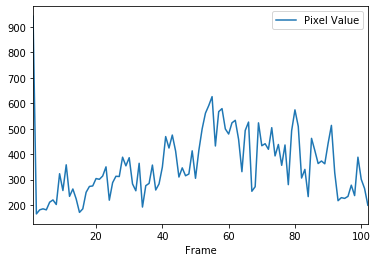

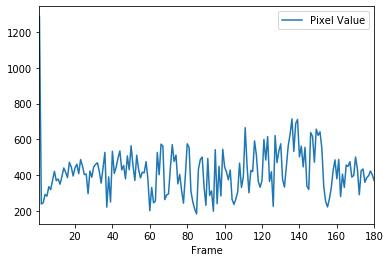

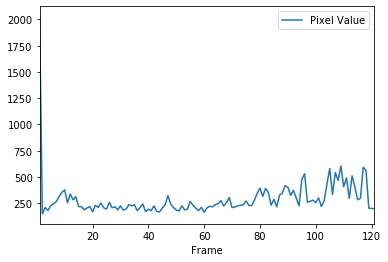

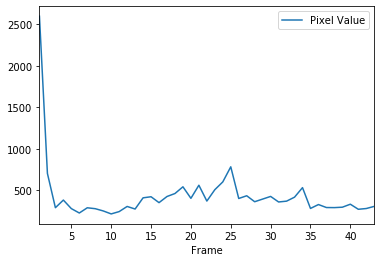

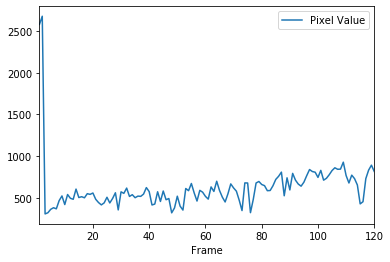

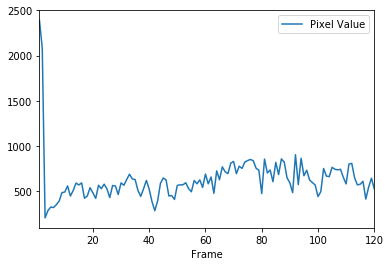

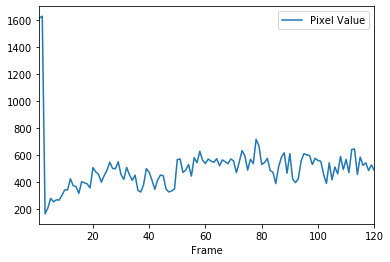

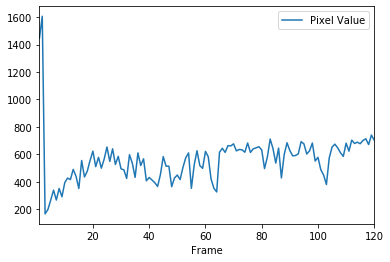

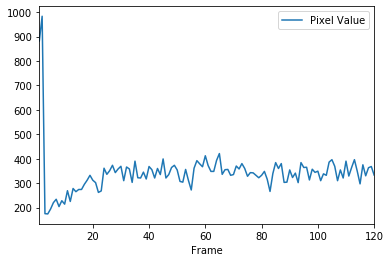

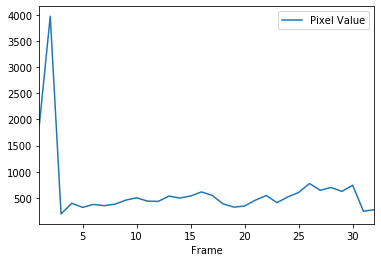

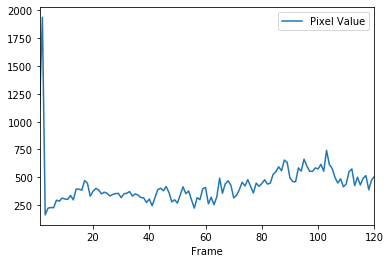

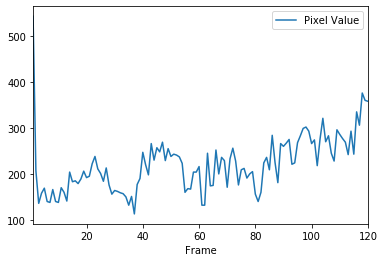

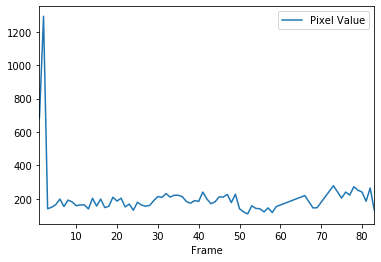

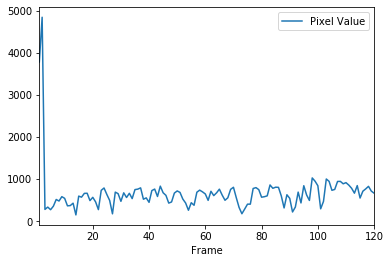

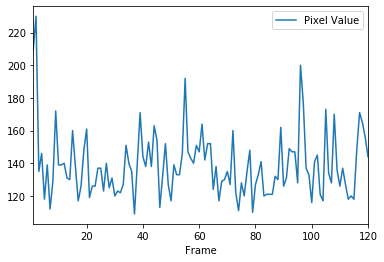

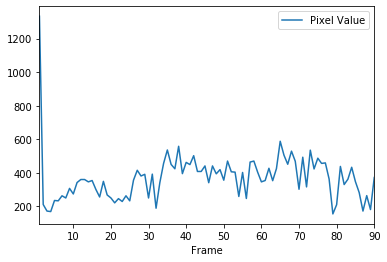

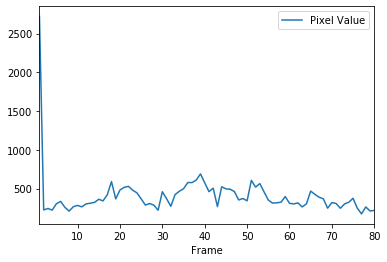

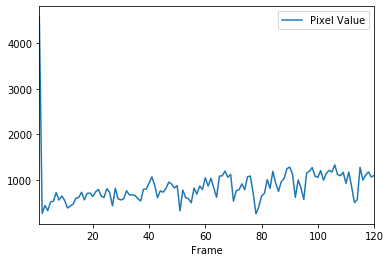

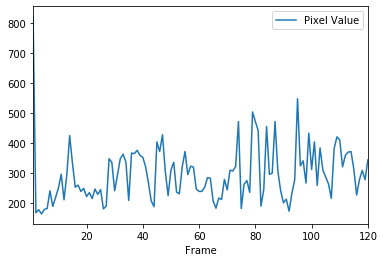

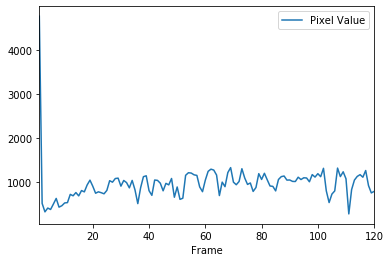

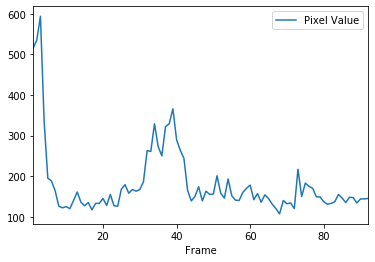

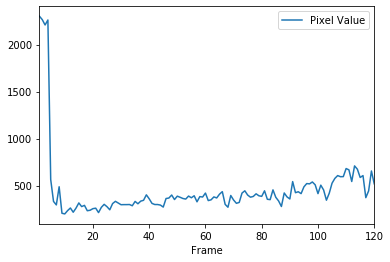

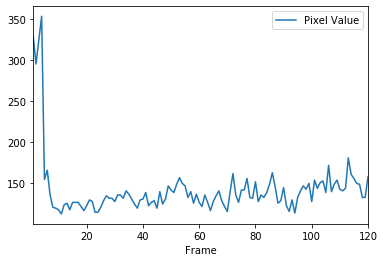

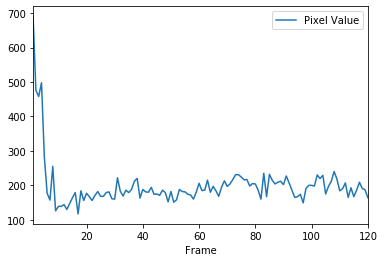

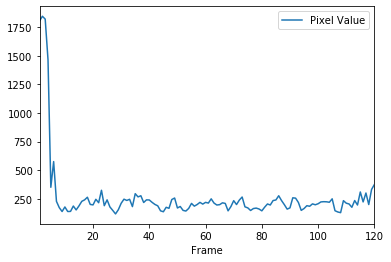

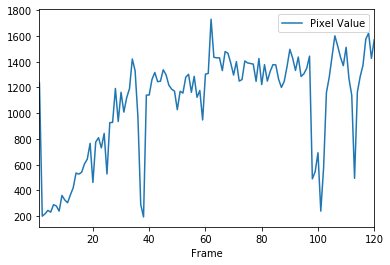

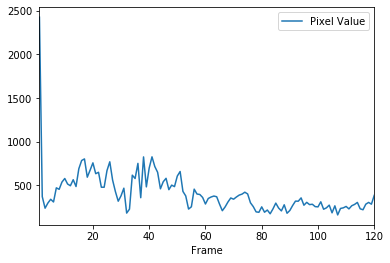

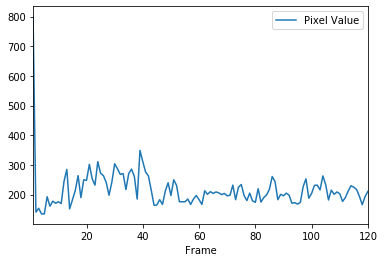

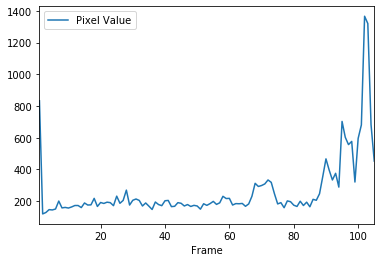

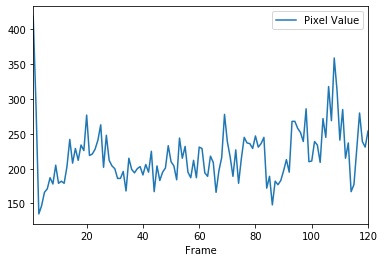

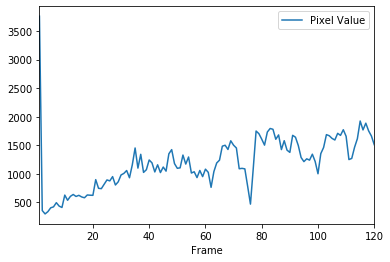

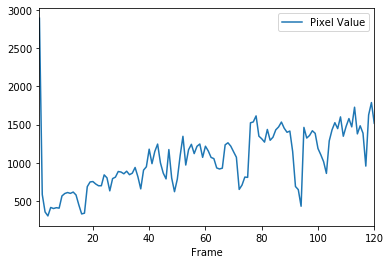

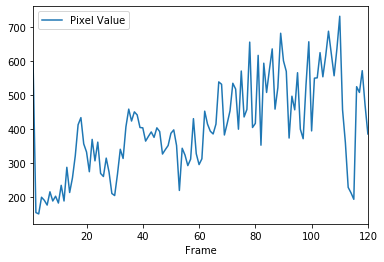

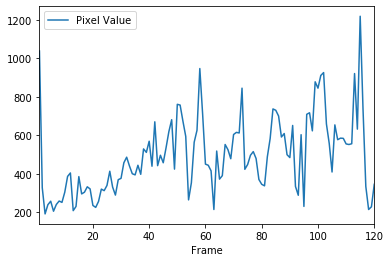

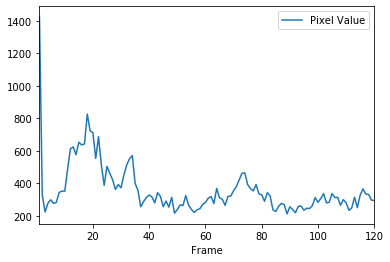

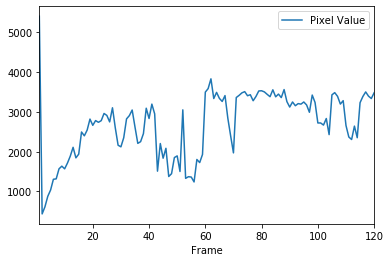

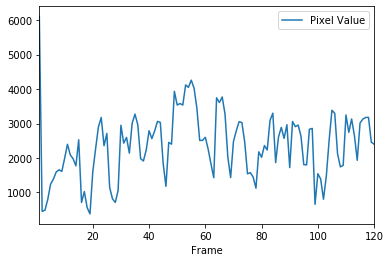

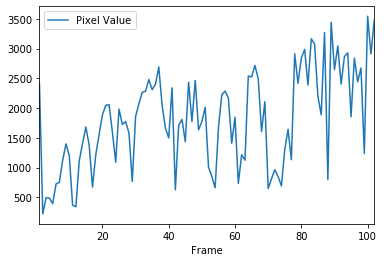

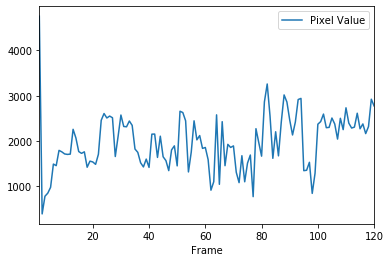

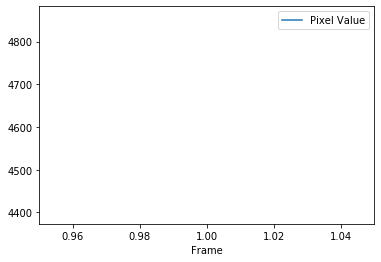

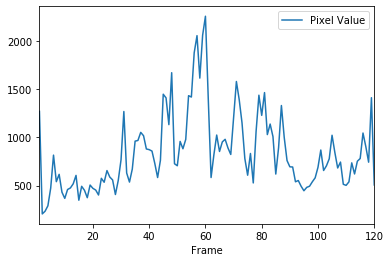

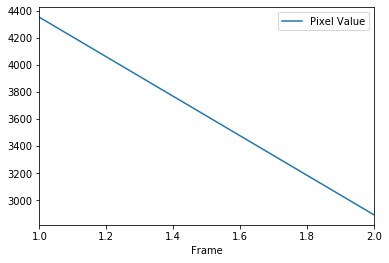

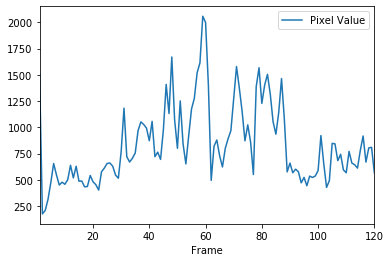

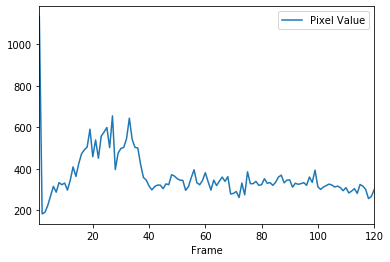

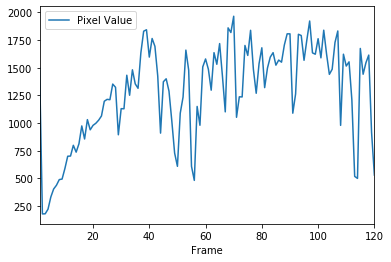

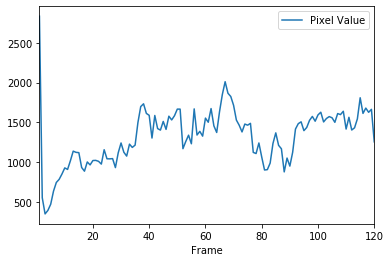

In [62]:
combined_df.groupby(by=['File', 'Track']).plot(x='Frame', y='Pixel Value');
# The single pixel measurements are too noisy and have no measurements to normalise to.

In [ ]:
# Can I plot the two proteins? files 0-6 are ALKv1

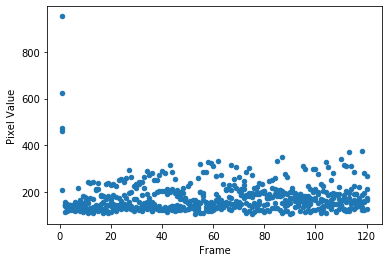

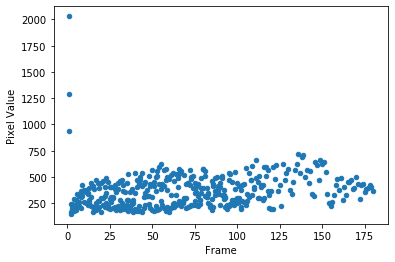

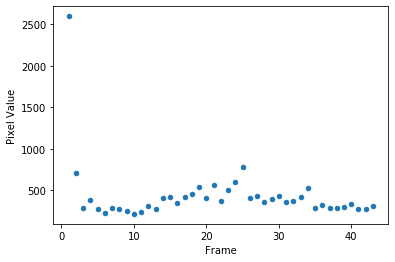

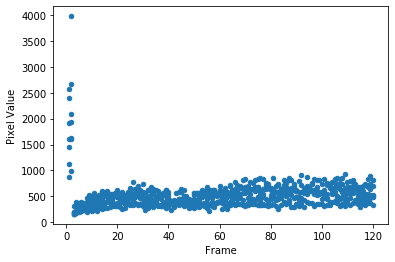

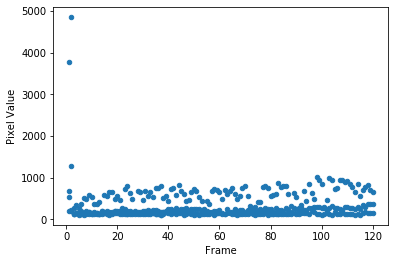

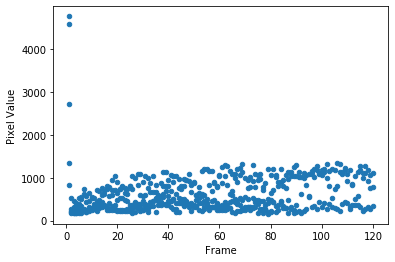

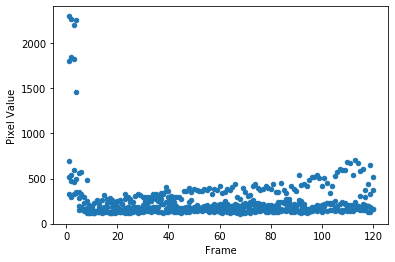

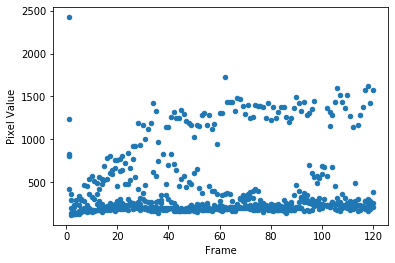

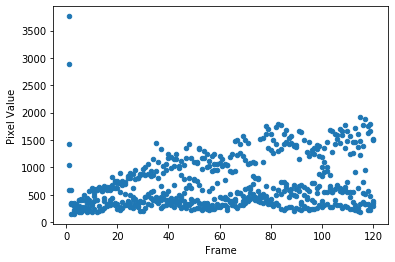

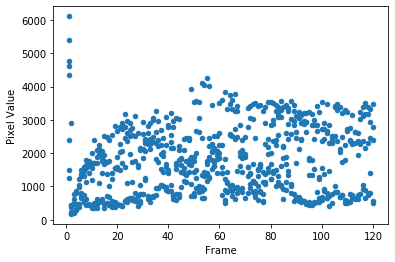

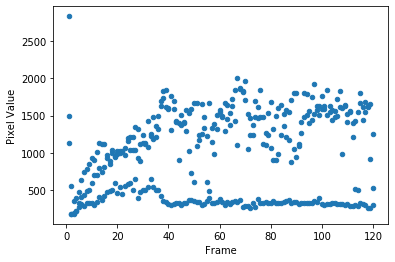

In [64]:
combined_df.groupby(by=['File']).plot(x='Frame', y='Pixel Value', kind='scatter');

In [ ]:
## So we need a script to generate ImageJ ROIs from coordinate lists and measure intensities.
## Probably this would just be easier in python, now we have the coordinate lists to work from.
## Perhaps the whole workflow would be easier in python

In [66]:
import cv2

ModuleNotFoundError: No module named 'cv2'